# Download Datasets from Kaggle

In [ ]:
!kaggle datasets download -d truthisneverlinear/childrens-dental-panoramic-radiographs-dataset

Dataset URL: https://www.kaggle.com/datasets/truthisneverlinear/childrens-dental-panoramic-radiographs-dataset
License(s): CC0-1.0
 99% 1.53G/1.55G [00:17<00:00, 115MB/s]
100% 1.55G/1.55G [00:17<00:00, 96.9MB/s]


In [ ]:
!kaggle datasets download -d wanmugui/childrens-dental-panoramic-x-ray-dataset 

Dataset URL: https://www.kaggle.com/datasets/wanmugui/childrens-dental-panoramic-x-ray-dataset
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 520M/520M [00:05<00:00, 124MB/s]
100% 520M/520M [00:05<00:00, 93.7MB/s]


In [ ]:
!unzip childrens-dental-panoramic-radiographs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dental_dataset/Adult tooth segmentation dataset/Dataset and code/test/masks_supplementary/img/cate4-00057.png  
  inflating: Dental_dataset/Adult tooth segmentation dataset/Dataset and code/test/masks_supplementary/img/cate4-00058.png  
  inflating: Dental_dataset/Adult tooth segmentation dataset/Dataset and code/test/masks_supplementary/img/cate4-00059.png  
  inflating: Dental_dataset/Adult tooth segmentation dataset/Dataset and code/test/masks_supplementary/img/cate4-00060.png  
  inflating: Dental_dataset/Adult tooth segmentation dataset/Dataset and code/test/masks_supplementary/img/cate4-00061.png  
  inflating: Dental_dataset/Adult tooth segmentation dataset/Dataset and code/test/masks_supplementary/img/cate4-00062.png  
  inflating: Dental_dataset/Adult tooth segmentation dataset/Dataset and code/test/masks_supplementary/img/cate4-00063.png  
  inflating: Dental_dataset/Adult tooth segmentation dataset/Dataset and c

In [ ]:
!unzip childrens-dental-panoramic-x-ray-dataset.zip

Archive:  childrens-dental-panoramic-x-ray-dataset.zip
  inflating: 849 unmarked X-RAY/04cc40f5-SA0439.jpg  
  inflating: 849 unmarked X-RAY/051ce953-FA0258.jpg  
  inflating: 849 unmarked X-RAY/077bc434-FC0570.jpg  
  inflating: 849 unmarked X-RAY/0a893961-FA0789.jpg  
  inflating: 849 unmarked X-RAY/0bd6af36-SA0394.jpg  
  inflating: 849 unmarked X-RAY/1c6bed1d-FA0189.jpg  
  inflating: 849 unmarked X-RAY/28116c08-FA0708.jpg  
  inflating: 849 unmarked X-RAY/2828f825-SA0253.jpg  
  inflating: 849 unmarked X-RAY/2df313b2-FA0732.jpg  
  inflating: 849 unmarked X-RAY/2e3d0dec-FI0188.jpg  
  inflating: 849 unmarked X-RAY/2e72ee65-FA0536.jpg  
  inflating: 849 unmarked X-RAY/30652c67-SA0352.jpg  
  inflating: 849 unmarked X-RAY/34a69ebc-FA0383.jpg  
  inflating: 849 unmarked X-RAY/3ca2d1f4-SA0232.jpg  
  inflating: 849 unmarked X-RAY/404.jpg  
  inflating: 849 unmarked X-RAY/405.jpg  
  inflating: 849 unmarked X-RAY/406.jpg  
  inflating: 849 unmarked X-RAY/407.jpg  
  inflating: 849 unma

# Saving Datasets for later use

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
source_folder = '/content/CHILDRENS DENTAL PANORAMIC X-RAY DATASET'
destination_folder = '/content/drive/MyDrive/Age model_updated/age_dataset'

!cp -r "{source_folder}" "{destination_folder}"

# Imports Necessary Modules

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

# Data Paths

In [ ]:
base_dir = '/content/drive/MyDrive/Age model_updated/age_dataset'
train_dir = f'{base_dir}/train'
valid_dir = f'{base_dir}/val'
test_dir = f'{base_dir}/test'

# Dataset Distribution: Train Set

In [ ]:
print("Train set:\n========================================")
print(f"Adult={len(os.listdir(os.path.join(train_dir, 'adult')))} images")
print(f"Child={len(os.listdir(os.path.join(train_dir, 'child')))} images")

Train set:
Adult=1206 images
Child=1200 images


# Dataset Distribution: Test Set

In [ ]:
print("Test set:\n========================================")
print(f"Adult={len(os.listdir(os.path.join(test_dir, 'adult')))} images")
print(f"Child={len(os.listdir(os.path.join(test_dir, 'child')))} images")

Test set:
Adult=206 images
Child=200 images


# Dataset Distribution: Validation Set

In [ ]:
print("Val set:\n========================================")
print(f"Adult={len(os.listdir(os.path.join(valid_dir, 'adult')))} images")
print(f"Child={len(os.listdir(os.path.join(valid_dir, 'child')))} images")

Val set:
Adult=306 images
Child=300 images


# Number of Images in each Class (Train, Validation, Test)

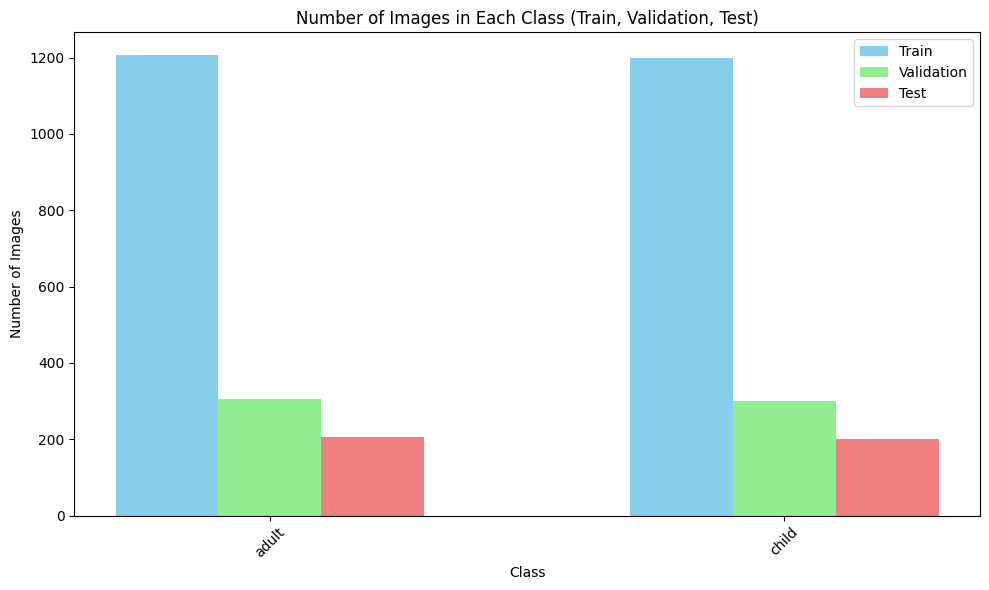

In [ ]:
def count_images_in_classes(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
    return class_counts

train_counts = count_images_in_classes(train_dir)
valid_counts = count_images_in_classes(valid_dir)
test_counts = count_images_in_classes(test_dir)
all_classes = list(train_counts.keys())
train_values = [train_counts.get(cls, 0) for cls in all_classes]
valid_values = [valid_counts.get(cls, 0) for cls in all_classes]
test_values = [test_counts.get(cls, 0) for cls in all_classes]
x = np.arange(len(all_classes))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - width, train_values, width, label='Train', color='skyblue')
plt.bar(x, valid_values, width, label='Validation', color='lightgreen')
plt.bar(x + width, test_values, width, label='Test', color='lightcoral')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class (Train, Validation, Test)')
plt.xticks(x, all_classes, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Hyperparameters

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10
ROTATION_RANGE = 5
WIDTH_SHIFT_RANGE = 0.02
HEIGHT_SHIFT_RANGE = 0.02 
ZOOM_RANGE = 0.02
SHEAR_RANGE=0.02
BRIGHTNESS_RANGE = [0.95, 1.05]

# Image Preprocessing Pipeline

In [ ]:
target_size = (224, 224)

def preprocessing(image):
    """
    Perform preprocessing including :
        Convert grayscale to RGB ,
        resizing,
        normalization,
        contrast adjustment,
        Gaussian noise
    """

    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    image = cv2.resize(image, target_size)
    image = image.astype(np.float32) / 255.0

    contrast_factor = np.random.uniform(0.9, 1.1)
    image = tf.image.adjust_contrast(image, contrast_factor).numpy()

    gaussian_noise_stddev = np.random.uniform(0.01, 0.03)
    gaussian_noise = np.random.normal(0, gaussian_noise_stddev, image.shape)
    image = np.clip(image + gaussian_noise, 0, 1)

    return image

# Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocessing,
    rotation_range=ROTATION_RANGE,
    width_shift_range=WIDTH_SHIFT_RANGE,
    height_shift_range=HEIGHT_SHIFT_RANGE,
    shear_range=SHEAR_RANGE,
    zoom_range=ZOOM_RANGE,
    brightness_range=BRIGHTNESS_RANGE,
)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocessing)
test_datagen = ImageDataGenerator(preprocessing_function=preprocessing)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=target_size, batch_size=BATCH_SIZE, class_mode='binary', shuffle=True
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size=target_size, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=target_size, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)

images_batch, labels_batch = next(train_generator)

print(f"Sample shuffled labels in a batch: {labels_batch[:10]}")

Found 2406 images belonging to 2 classes.
Found 606 images belonging to 2 classes.
Found 406 images belonging to 2 classes.
Sample shuffled labels in a batch: [0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


# Visualizing Sample Images with Labels

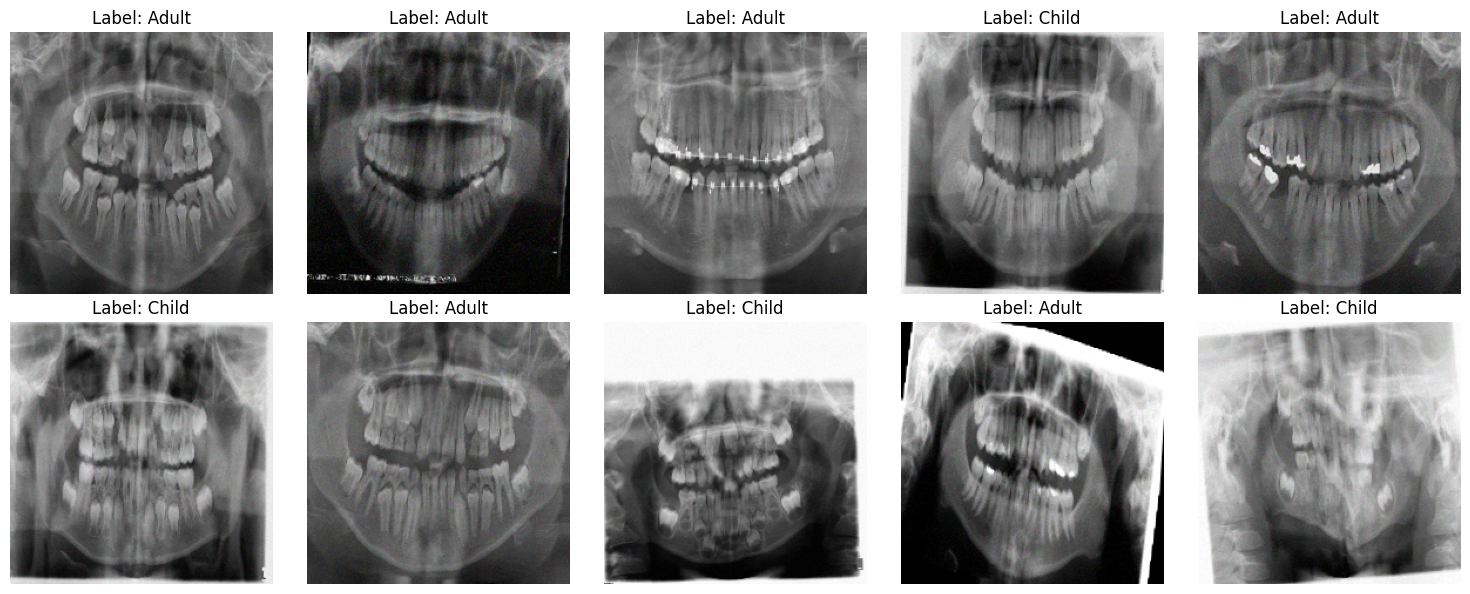

In [ ]:
label_mapping = {0: 'Adult', 1: 'Child'}
def plot_images_with_labels(generator, label_mapping, num_images=10, images_per_row=5):
    images, labels = next(generator)
    num_images_in_batch = images.shape[0]
    num_images = min(num_images, num_images_in_batch)
    num_rows = int(np.ceil(num_images / images_per_row))
    indices = np.random.choice(num_images_in_batch, num_images, replace=False)

    plt.figure(figsize=(images_per_row * 3, num_rows * 3))
    for i, index in enumerate(indices):
        plt.subplot(num_rows, images_per_row, i + 1)
        plt.imshow(images[index])
        plt.axis('off')

        label = labels[index]
        class_label = label_mapping.get(int(label), 'Unknown')
        plt.title(f'Label: {class_label}')

    plt.tight_layout()
    plt.show()

plot_images_with_labels(train_generator, label_mapping, num_images=10, images_per_row=5)

# InceptionV3 Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3

base_model  = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:200]:
    layer.trainable = False

for layer in base_model.layers[200:]:
    layer.trainable = True

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=valid_generator,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 539s 7s/step - accuracy: 0.8209 - loss: 0.4933 - val_accuracy: 0.9488 - val_loss: 0.1502
Epoch 2/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.9575 - loss: 0.1237 - val_accuracy: 0.9554 - val_loss: 0.1488
Epoch 3/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9645 - loss: 0.0909 - val_accuracy: 0.9620 - val_loss: 0.1376
Epoch 4/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9763 - loss: 0.0849 - val_accuracy: 0.9604 - val_loss: 0.1439
Epoch 5/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9762 - loss: 0.0845 - val_accuracy: 0.9670 - val_loss: 0.1228


# Model Summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,377,189 (89.18 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 1,049,604 (4.00 MB)

# Training vs. Validation Accuracy Over Epochs

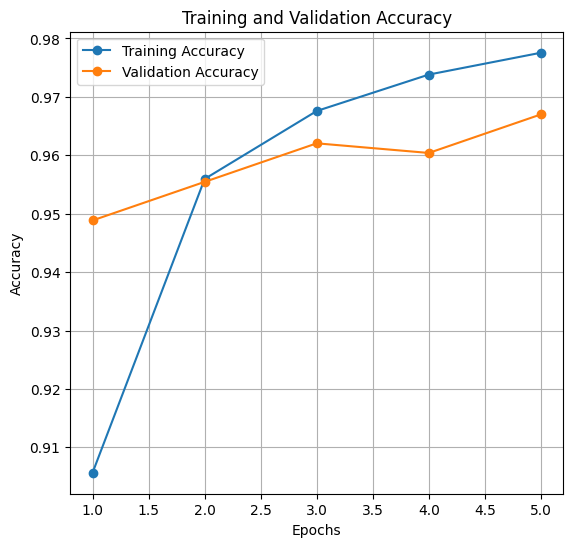

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

# Training vs. Validation Loss Over Epochs

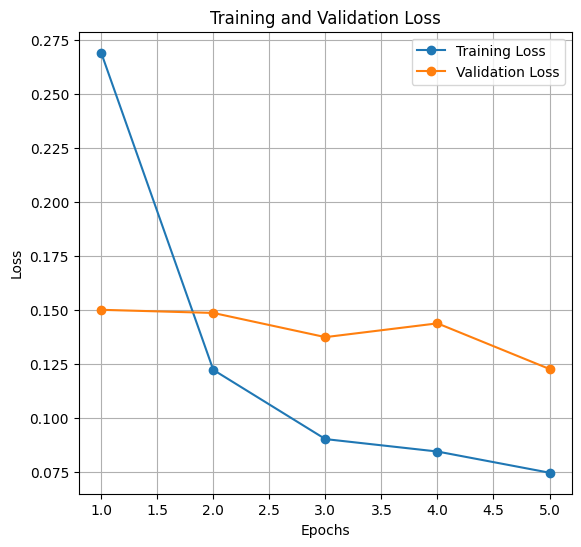

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

#  Evaluating the Model Performance

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 91.75%


# Classification Report

In [5]:
from sklearn.metrics import classification_report
Y_pred =model.predict(test_generator)
y_pred = (Y_pred > 0.5).astype(int).flatten()

test_labels = test_generator.classes
print("Classification Report:")
print(classification_report(test_labels, y_pred, target_names= ['Adult', 'Child']))

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 517ms/step
Classification Report:
              precision    recall  f1-score   support

       Adult       0.94      0.90      0.92        49
       Child       0.90      0.94      0.92        48

    accuracy                           0.92        97
   macro avg       0.92      0.92      0.92        97
weighted avg       0.92      0.92      0.92        97



# Confusion Matrix

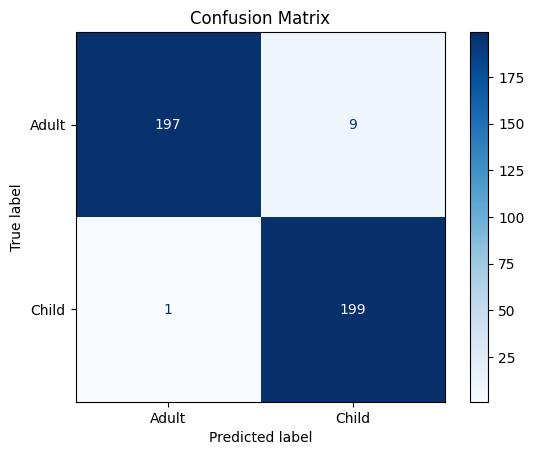

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['Adult', 'Child'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step


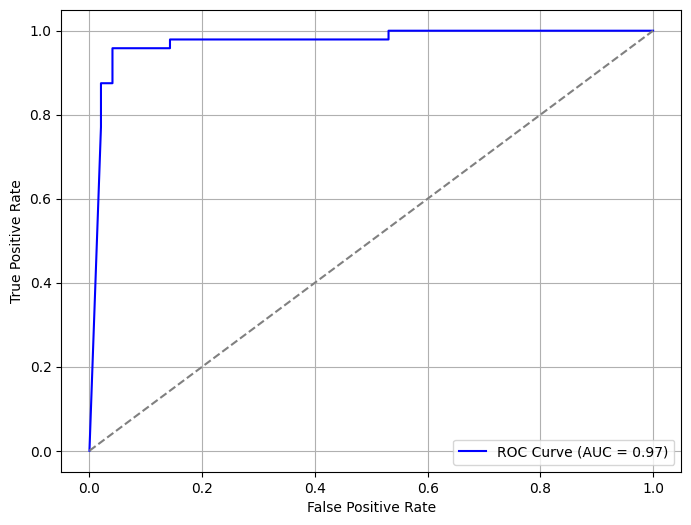

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, _ = roc_curve(test_labels, Y_pred)
auc_score = roc_auc_score(test_labels, Y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Saving the Trained Model

In [ ]:
model.save('Age_InceptionV3.h5')

source_folder = '/content/Age_InceptionV3.h5'
destination_folder = '/content/drive/MyDrive/saved_for_me'
!cp -r "{source_folder}" "{destination_folder}"
if os.path.exists(destination_folder):
    print(f"Dataset successfully saved to {destination_folder}")
else:
    print("Failed to save the dataset to Google Drive.")

Dataset successfully saved to /content/drive/MyDrive/saved_for_me


# Load Trained Model and Predict Age Group Class from a New Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Predicted Age: Child
Prediction Confidence: 0.84


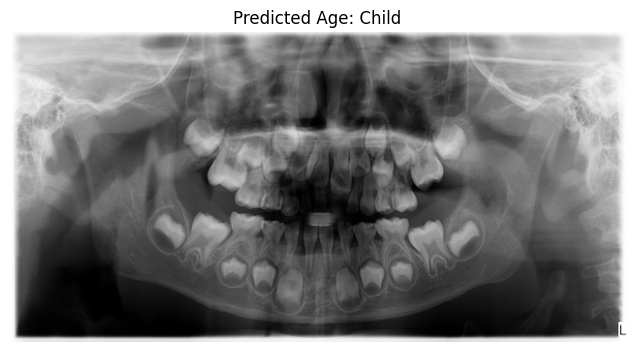

In [ ]:
import numpy as np
import cv2
import os
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

model_path = '/content/drive/MyDrive/saved_for_me/Age_InceptionV3.h5'
image_path = '/content/drive/MyDrive/Age model_updated/age_dataset/test/child/411.jpg'

model = load_model(model_path)
target_size = (224, 224)
def preprocessing(image):
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    image = cv2.resize(image, target_size)
    image = image.astype(np.float32) / 255.0

    contrast_factor = np.random.uniform(0.9, 1.1)
    image = tf.image.adjust_contrast(image, contrast_factor).numpy()

    return image

def predict_image(image_path, model):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Failed to load image from {image_path}")

    image = preprocessing(image)
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    predicted_class = 1 if prediction[0] >= 0.5 else 0
    return predicted_class, prediction[0]
predicted_class, prediction_score = predict_image(image_path, model)
class_labels = ['Adult', 'Child']
print(f"Predicted Age: {class_labels[predicted_class]}")
print(f"Prediction Confidence: {prediction_score[0]:.2f}")

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Age: {class_labels[predicted_class]} ")
plt.axis('off')
plt.show()
